<a href="https://colab.research.google.com/github/sabikbshah/datascience1/blob/main/Unemployment_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#data1=pd.read_csv('/content/Unemployment in India.csv')

In [ ]:
data1=pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [ ]:
data1.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74


In [ ]:
data1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
data1.shape

(267, 9)

In [ ]:
data1.columns=['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude']

# For dataset 1

A horizontal line indicates null values along certain rows where whole row is null.

In [ ]:
null_rows = data1.loc[data1['Date'].isnull()]

In [ ]:
data1.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

Percent of null values

In [ ]:
data1.isnull().sum()/data1.shape[0]*100

Region                                     0.0
Date                                       0.0
Frequency                                  0.0
Estimated Unemployment Rate (%)            0.0
Estimated Employed                         0.0
Estimated Labour Participation Rate (%)    0.0
Region.1                                   0.0
longitude                                  0.0
latitude                                   0.0
dtype: float64

Drop null rows.

In [ ]:
#Total percent of original data able to be used after dropping null values
len(data1.dropna())/len(data1)*100

100.0

In [ ]:
df=data1.dropna()

# End for dataset 1

Checking for null values

In [ ]:
data1.isna().any()

Region                                     False
Date                                       False
Frequency                                  False
Estimated Unemployment Rate (%)            False
Estimated Employed                         False
Estimated Labour Participation Rate (%)    False
Region.1                                   False
longitude                                  False
latitude                                   False
dtype: bool

Checking for duplicate values

In [ ]:
data1.duplicated().sum()

0

Exploring Stats.

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
data1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


<Axes: xlabel='Estimated Labour Participation Rate (%)', ylabel='Count'>

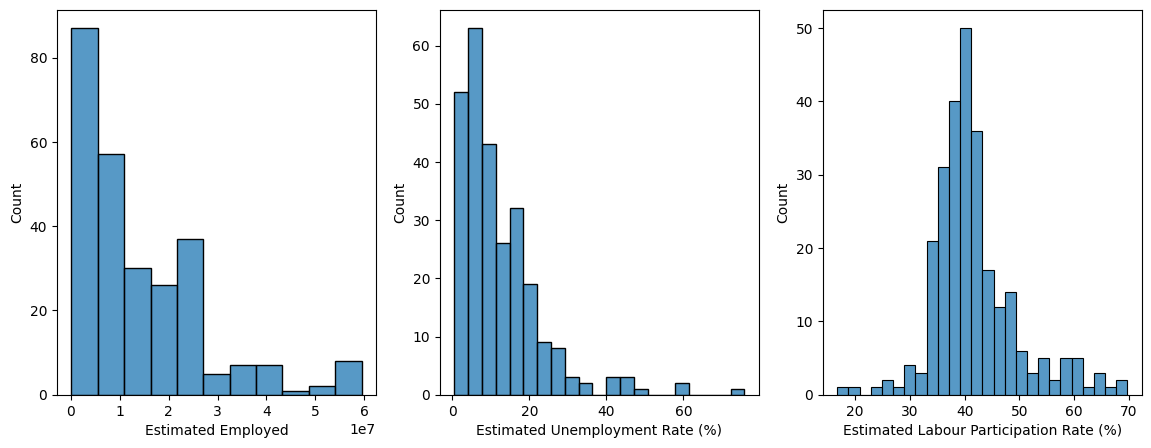

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(14,5))
sns.histplot( data1['Estimated Employed'],ax=axes[0])
sns.histplot( data1['Estimated Unemployment Rate (%)'],ax=axes[1])
sns.histplot( data1['Estimated Labour Participation Rate (%)'],ax=axes[2])

# Exploring Date

In [ ]:
data1.Date.unique() # we can identify how many different dates are there but this way would be difficult with larger datasets.

array([' 31-01-2020', ' 29-02-2020', ' 31-03-2020', ' 30-04-2020',
       ' 31-05-2020', ' 30-06-2020', ' 31-07-2020', ' 31-08-2020',
       ' 30-09-2020', ' 31-10-2020'], dtype=object)

In [ ]:
data1['Day']=data1['Date'].str.split('-').str[0]
data1['Month']=data1['Date'].str.split('-').str[1]
data1['Year']=data1['Date'].str.split('-').str[2]


In [ ]:
data1.head(1)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Day,Month,Year
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74,31,01,2020


In [ ]:
print(data1.Month.unique())
print(data1.Day.unique())
data1.Year.unique()

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10']
[' 31' ' 29' ' 30']


array(['2020'], dtype=object)

We can remove Year columns since its of same year 2020.
Data is of first 10 months with report collected at last day of month.

# Exploring unique values

In [ ]:
data1.describe(include=('O'))

,Region,Date,Frequency,Region.1,Day,Month,Year
count,267,267,267,267,267,267,267
unique,27,10,1,5,3,10,1
top,Andhra Pradesh,31-03-2020,M,North,31,03,2020
freq,10,27,267,79,161,27,267


In [ ]:
# Region
data1['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [ ]:
data1['Region'].value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64

In [ ]:
data1.groupby('Region')['Estimated Employed','Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)'].mean().sort_values(by='Estimated Unemployment Rate (%)')

<ipython-input-25-3f436c8a8daa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1.groupby('Region')['Estimated Employed','Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)'].mean().sort_values(by='Estimated Unemployment Rate (%)')


,Estimated Employed,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
Region,,,
Meghalaya,1.349815e+06,3.866000,59.859000
Assam,1.081028e+07,4.856000,43.498000
Gujarat,2.273075e+07,6.376000,45.490000
Odisha,1.272683e+07,6.462000,37.748000
Telangana,1.624408e+07,6.833000,54.972000
Madhya Pradesh,2.231834e+07,6.854000,38.926000
Karnataka,2.162402e+07,7.668000,42.000000
Chhattisgarh,8.421349e+06,7.819000,41.161000
Maharashtra,3.920476e+07,7.979000,41.466000


THis linne plot may show y values for different time line and not sequential order if it is so we need tosort date and accordingly judge.

<Axes: >

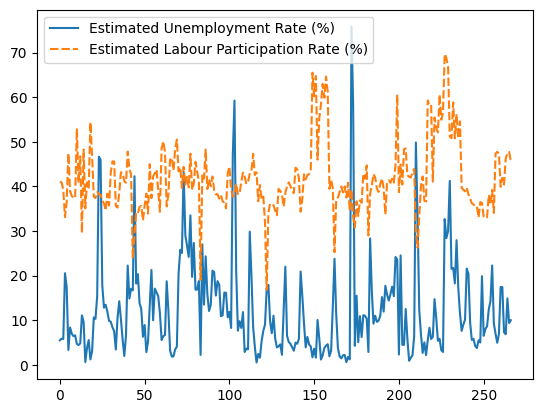

In [ ]:
sns.lineplot(data1[['Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)']])

In [ ]:
data1.groupby('Month')[['Month','Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)']].agg(['median','mean'])

Month               Estimated Unemployment Rate (%)             \
      median          mean                          median       mean   
Month                                                                   
01       1.0  3.885004e+48                           6.240   9.196538   
02       2.0  7.770008e+48                           6.990   9.266154   
03       3.0  1.122334e+51                           8.230  10.782593   
04       4.0  1.554002e+49                          17.555  22.236154   
05       5.0  1.870557e+51                          19.970  23.244444   
06       6.0  2.244669e+51                           9.710  10.911111   
07       7.0  2.618780e+51                           7.630   9.834444   
08       8.0  2.992892e+51                           9.760  10.313333   
09       9.0  3.367003e+51                           6.400   8.705926   
10      10.0  3.741115e+51                           6.270   8.026296   

      Estimated Labour Participation Rate (%)             
                                       median       mean  
Month                                                     
01                                     42.510  44.626538  
02                                     41.745  44.180769  
03                                     41.040  43.746667  
04                                     35.540  35.297308  
05                                     38.220  39.647778  
06                                     40.390  41.203333  
07                                     40.880  42.274815  
08                                     41.710  42.390741  
09                                     39.200  41.974444  
10                                     40.010  41.438519

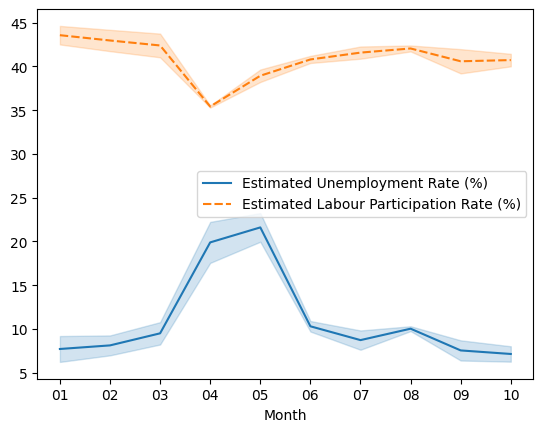

In [ ]:
sns.lineplot(
    data1.groupby('Month')[['Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)']].agg(['median','mean'])

)
plt.legend()

Since median and mean are not different by large theres no outliers.

In [ ]:
data1[['Month','Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)']].groupby('Month')

In [ ]:
data1['Estimated Employed'].agg(['min','max','median'])

min         117542.0
max       59433759.0
median     9732417.0
Name: Estimated Employed, dtype: float64

In [ ]:
data1['Region'].nunique()

27

In [ ]:
data1.Frequency.unique()

array([' M'], dtype=object)

We drop year and frequency as they are same for all data.

In [ ]:
data1.head(1)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Day,Month,Year
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74,31,01,2020


# Obtaining total effect in about 10 months on labour Participation
 # And Estimating highest to lowest fluctuations by region.


 **Andhra Pradesh for example 1**
* Its visulization will gives us how we can get total effect for all other **REGIONS** *

In [ ]:
data1[(data1['Region']=='Andhra Pradesh')][['Month','Estimated Labour Participation Rate (%)']].sort_values(by='Month')

,Month,Estimated Labour Participation Rate (%)
0,01,41.02
1,02,40.90
2,03,39.18
3,04,33.10
4,05,36.46
5,06,47.41
6,07,38.91
7,08,37.83
8,09,37.47
9,10,37.34


In [ ]:
df_region=data1[(data1['Region']=='Andhra Pradesh')][['Month','Estimated Labour Participation Rate (%)']].sort_values(by='Month')

In [ ]:
 # next ELPR element substract previous element then value is put to Diff Columns.
df_region['Diff']=df_region['Estimated Labour Participation Rate (%)'].diff()

In [ ]:
df_region

,Month,Estimated Labour Participation Rate (%),Diff
0,01,41.02,NaN
1,02,40.90,-0.12
2,03,39.18,-1.72
3,04,33.10,-6.08
4,05,36.46,3.36
5,06,47.41,10.95
6,07,38.91,-8.50
7,08,37.83,-1.08
8,09,37.47,-0.36
9,10,37.34,-0.13


By summing up all rate changes (+/-) we get total effect at end of 10 month.

In [ ]:
df_region['Diff'].sum()

-3.6799999999999997

above difference column by changing all to positive values.
Then summing we see Measurement of fluctuation.

In [ ]:
pos=df_region[df_region['Diff']>0]['Diff'].sum() #obtaining positive difference in pos variable
neg=df_region[df_region['Diff']<0]['Diff'].sum()#obtaining negative difference in neg variable
pos+neg

-3.6799999999999997

In [ ]:
# to round the decimal number on all values of Difference column
df_region['Diff']=df_region['Diff'].apply(lambda x: round(x,2))

* Andhra pradesh Estimated labour Participation Rate with changes as annoted*

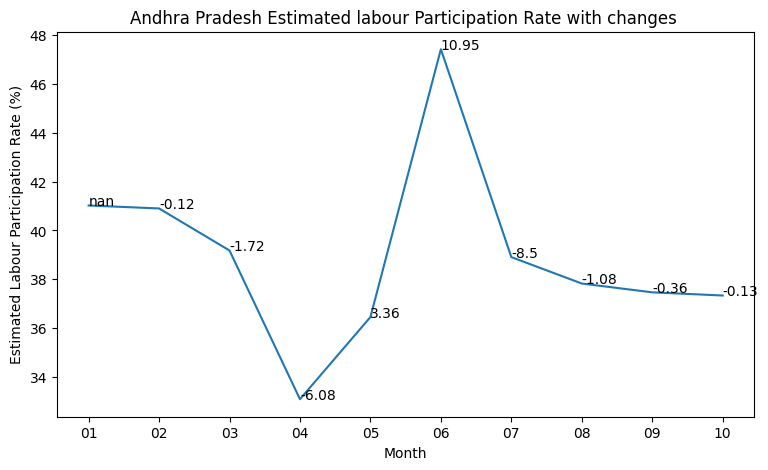

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))

plt.plot(df_region['Month'],df_region['Estimated Labour Participation Rate (%)'])

for index, row in df_region.iterrows():
    ax.annotate(row['Diff'], (row['Month'], row['Estimated Labour Participation Rate (%)']))

ax.set_xlabel('Month')
ax.set_ylabel('Estimated Labour Participation Rate (%)')
ax.set_title('Andhra Pradesh Estimated labour Participation Rate with changes ')

plt.show()

Pivot table for creating region as columns so that each column's each of region values can be plotted against/along months

In [ ]:
data1.pivot(
    columns='Region',values='Estimated Labour Participation Rate (%)',index='Month'
)

Region,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Month,,,,,,,,,,,,,,,,,,,,,
01,41.02,52.98,37.72,43.08,47.79,35.73,48.49,43.36,45.50,42.20,...,37.46,42.82,40.51,NaN,41.96,59.25,69.69,39.63,32.99,47.35
02,40.90,40.77,37.35,45.58,43.92,38.38,50.11,44.21,43.30,39.17,...,40.80,41.72,41.77,NaN,43.20,58.24,68.74,39.23,36.48,47.74
03,39.18,46.73,38.69,45.59,42.65,33.88,47.75,39.63,41.04,38.18,...,34.49,44.69,39.54,60.59,43.91,58.31,66.89,38.89,36.27,47.27
04,33.10,29.55,38.17,35.58,23.80,44.97,35.50,44.38,19.04,NaN,...,39.30,28.99,33.71,38.70,29.63,41.06,51.16,39.73,33.23,39.90
05,36.46,48.26,38.16,35.23,28.91,37.36,38.23,40.39,42.70,38.21,...,33.19,38.39,40.74,44.88,26.23,55.43,50.81,38.22,33.38,41.92
06,47.41,35.07,36.86,38.48,34.17,42.21,45.96,42.14,41.72,37.24,...,30.80,40.18,41.38,40.40,33.16,53.22,58.85,37.29,33.06,40.39
07,38.91,40.88,36.14,43.14,33.97,42.94,46.41,39.77,48.25,38.03,...,36.64,42.76,40.80,48.32,40.13,52.10,50.78,36.19,38.07,46.17
08,37.83,39.52,34.59,42.97,35.41,43.76,43.55,47.32,39.42,36.66,...,33.34,41.99,41.71,48.49,42.22,60.59,56.21,35.96,35.90,47.48
09,37.47,54.38,38.35,41.14,35.59,38.89,48.41,39.20,41.54,36.31,...,36.84,39.50,40.83,42.54,36.77,54.94,50.77,35.45,39.18,47.73


In [ ]:
pivoted=data1.pivot(
    columns='Region',values='Estimated Labour Participation Rate (%)',index='Month'
)

By summing each region all months values we get total effect at end of the 10th month.

In [ ]:
pivoted.diff().sum().sort_values()

Region
Sikkim             -18.46
Delhi              -15.43
Tripura            -15.11
Jammu & Kashmir     -7.18
Assam               -6.14
Himachal Pradesh    -5.49
Tamil Nadu          -5.34
Meghalaya           -4.31
Uttar Pradesh       -4.14
Punjab              -4.07
Andhra Pradesh      -3.68
Kerala              -3.60
Haryana             -2.76
Telangana           -2.67
Chhattisgarh        -2.26
Bihar               -2.02
Karnataka           -1.88
West Bengal         -1.72
Goa                 -1.43
Puducherry          -1.14
Madhya Pradesh      -0.95
Maharashtra         -0.44
Jharkhand            0.16
Odisha               0.54
Uttarakhand          1.04
Gujarat              2.00
Rajasthan            4.41
dtype: float64

Text(0.5, 1.0, 'Difference of Labour Participations from start to end of 10th month')

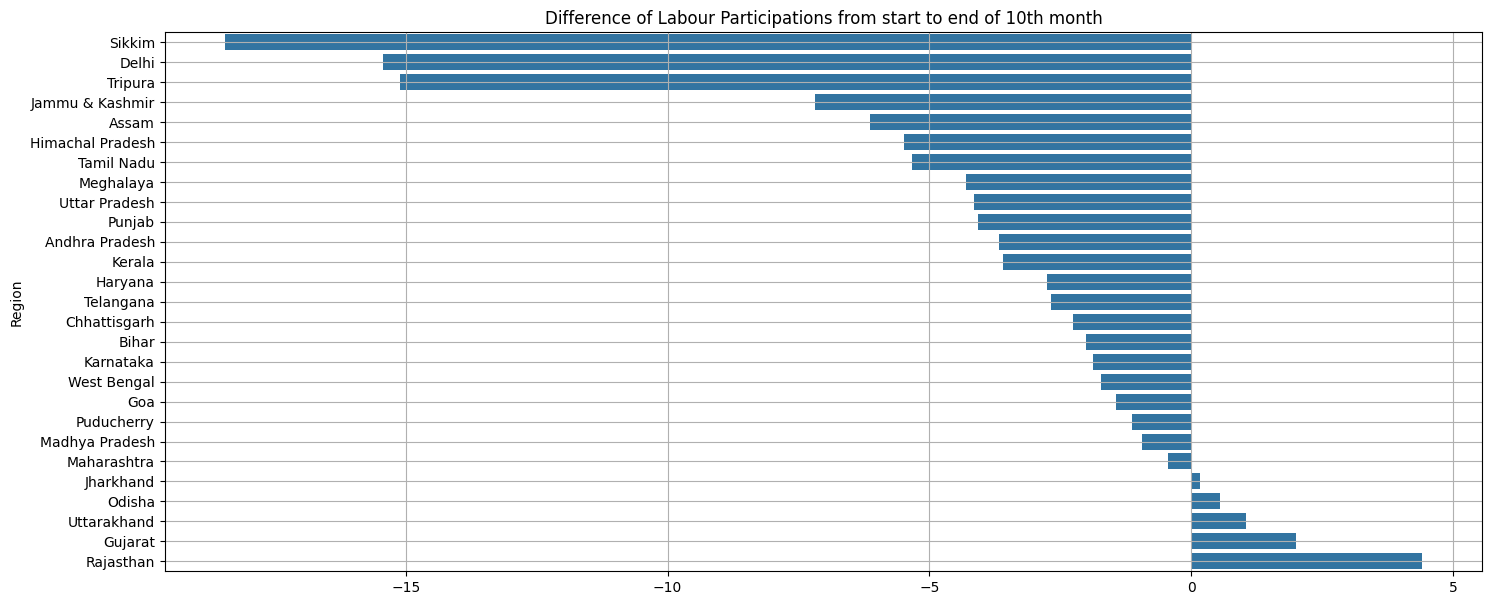

In [ ]:
fig, ax = plt.subplots(figsize=(17,7))
sns.barplot(x=pivoted.diff().sum().sort_values().values,
            y=pivoted.diff().sum().sort_values().index)
plt.grid()
plt.title('Difference of Labour Participations from start to end of 10th month')

In [ ]:
# Accessing first three index
#index[0:3] will access first three values of the result for a given function
pivoted.diff().sum().sort_values().index[0:3]

Index(['Sikkim', 'Delhi', 'Tripura'], dtype='object', name='Region')

In [ ]:
# Accessing last three index
#index[27:23:-1] performs backward loop from last value from 27th to 22nd.
#We can use index[ len(data['Region']):len(data['Region'])-3:-1 ]
pivoted.diff().sum().sort_values().index[27:23:-1]

Index(['Rajasthan', 'Gujarat', 'Uttarakhand'], dtype='object', name='Region')

*After Effect!*

---


We see top 3 highest decline in labour Participation are in:
---
* **Sikkim**
* **Delhi**
* **Tripura**

top 3 increment in Labour Participation are in:
---
* **Rajasthan**
* **Gujarat**
* **Uttarakhand**

Which region do these state belong?


In [ ]:
top_decline=pivoted.diff().sum().sort_values().index[0:3]
top_increment=pivoted.diff().sum().sort_values().index[27:23:-1]
R1=[]
R2=[]
for i,j in zip(top_decline,top_increment):
  R1.append(data1[data1['Region']==i]['Region.1'].unique())
  R2.append(data1[data1['Region']==j]['Region.1'].unique())

dec_df=pd.DataFrame( {'State':top_decline,'Region':R1})
inc_df=pd.DataFrame( {'State':top_increment,'Region':R2})


In [ ]:
inc_df

,State,Region
0,Rajasthan,[North]
1,Gujarat,[West]
2,Uttarakhand,[North]


In [ ]:
dec_df

,State,Region
0,Sikkim,[Northeast]
1,Delhi,[North]
2,Tripura,[Northeast]


**Correlation**

<ipython-input-168-c487bc00001e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( data1.corr(),annot=True)


<Axes: >

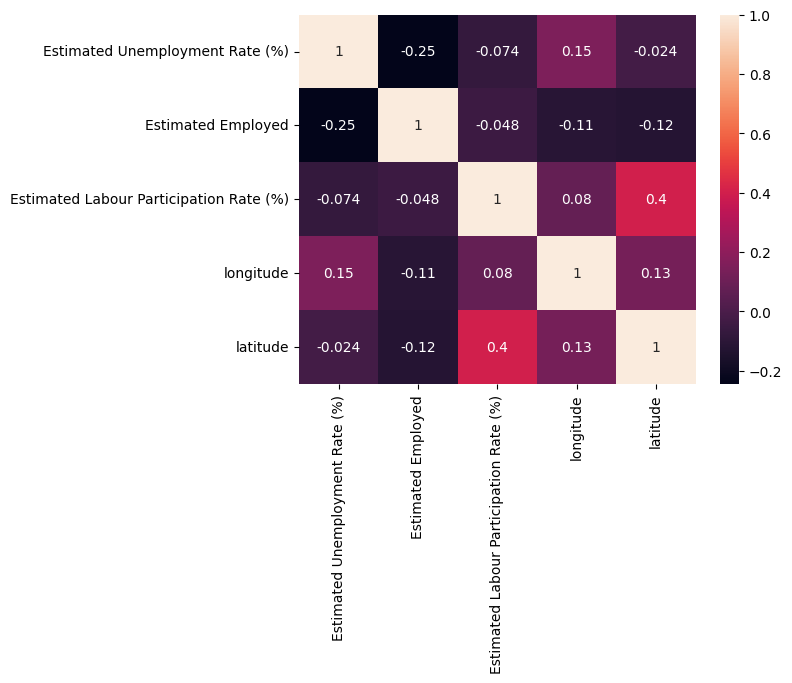

In [ ]:
sns.heatmap( data1.corr(),annot=True)

<Axes: xlabel='Month'>

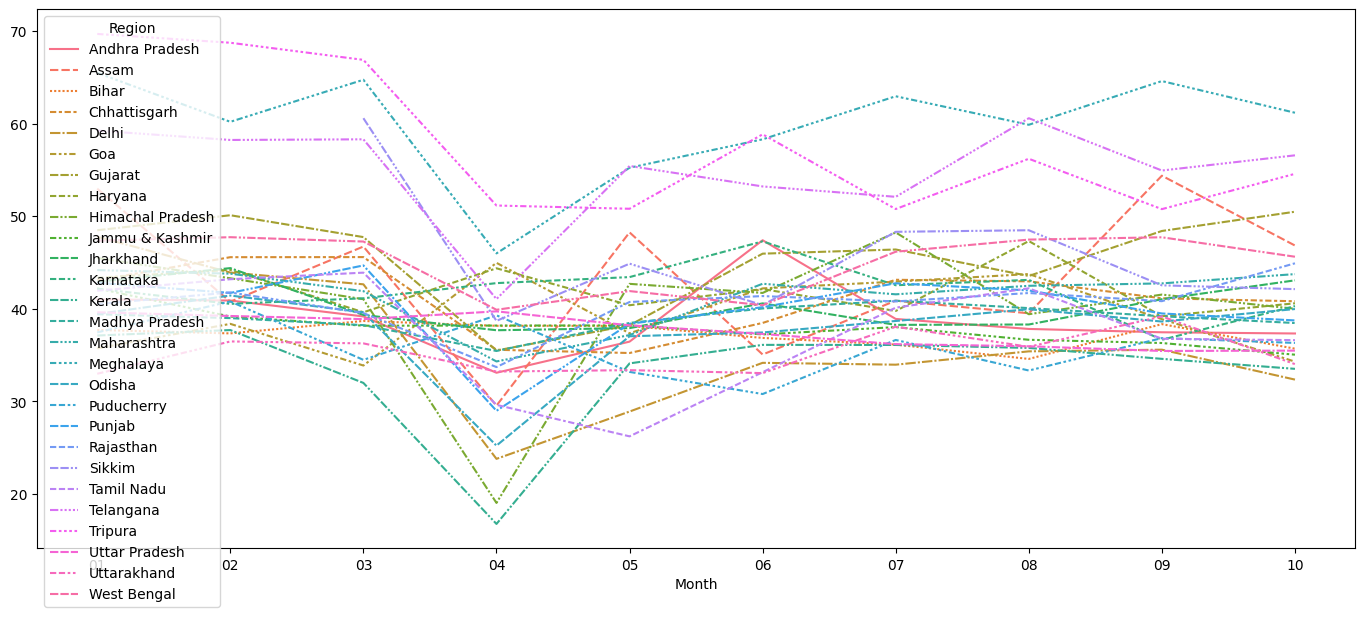

In [ ]:
fig, ax = plt.subplots(figsize=(17,7))

#plt.plot(data1['Month'],data1['Estimated Labour Participation Rate (%)'],hue='Region')
sns.lineplot(
    pivoted
)


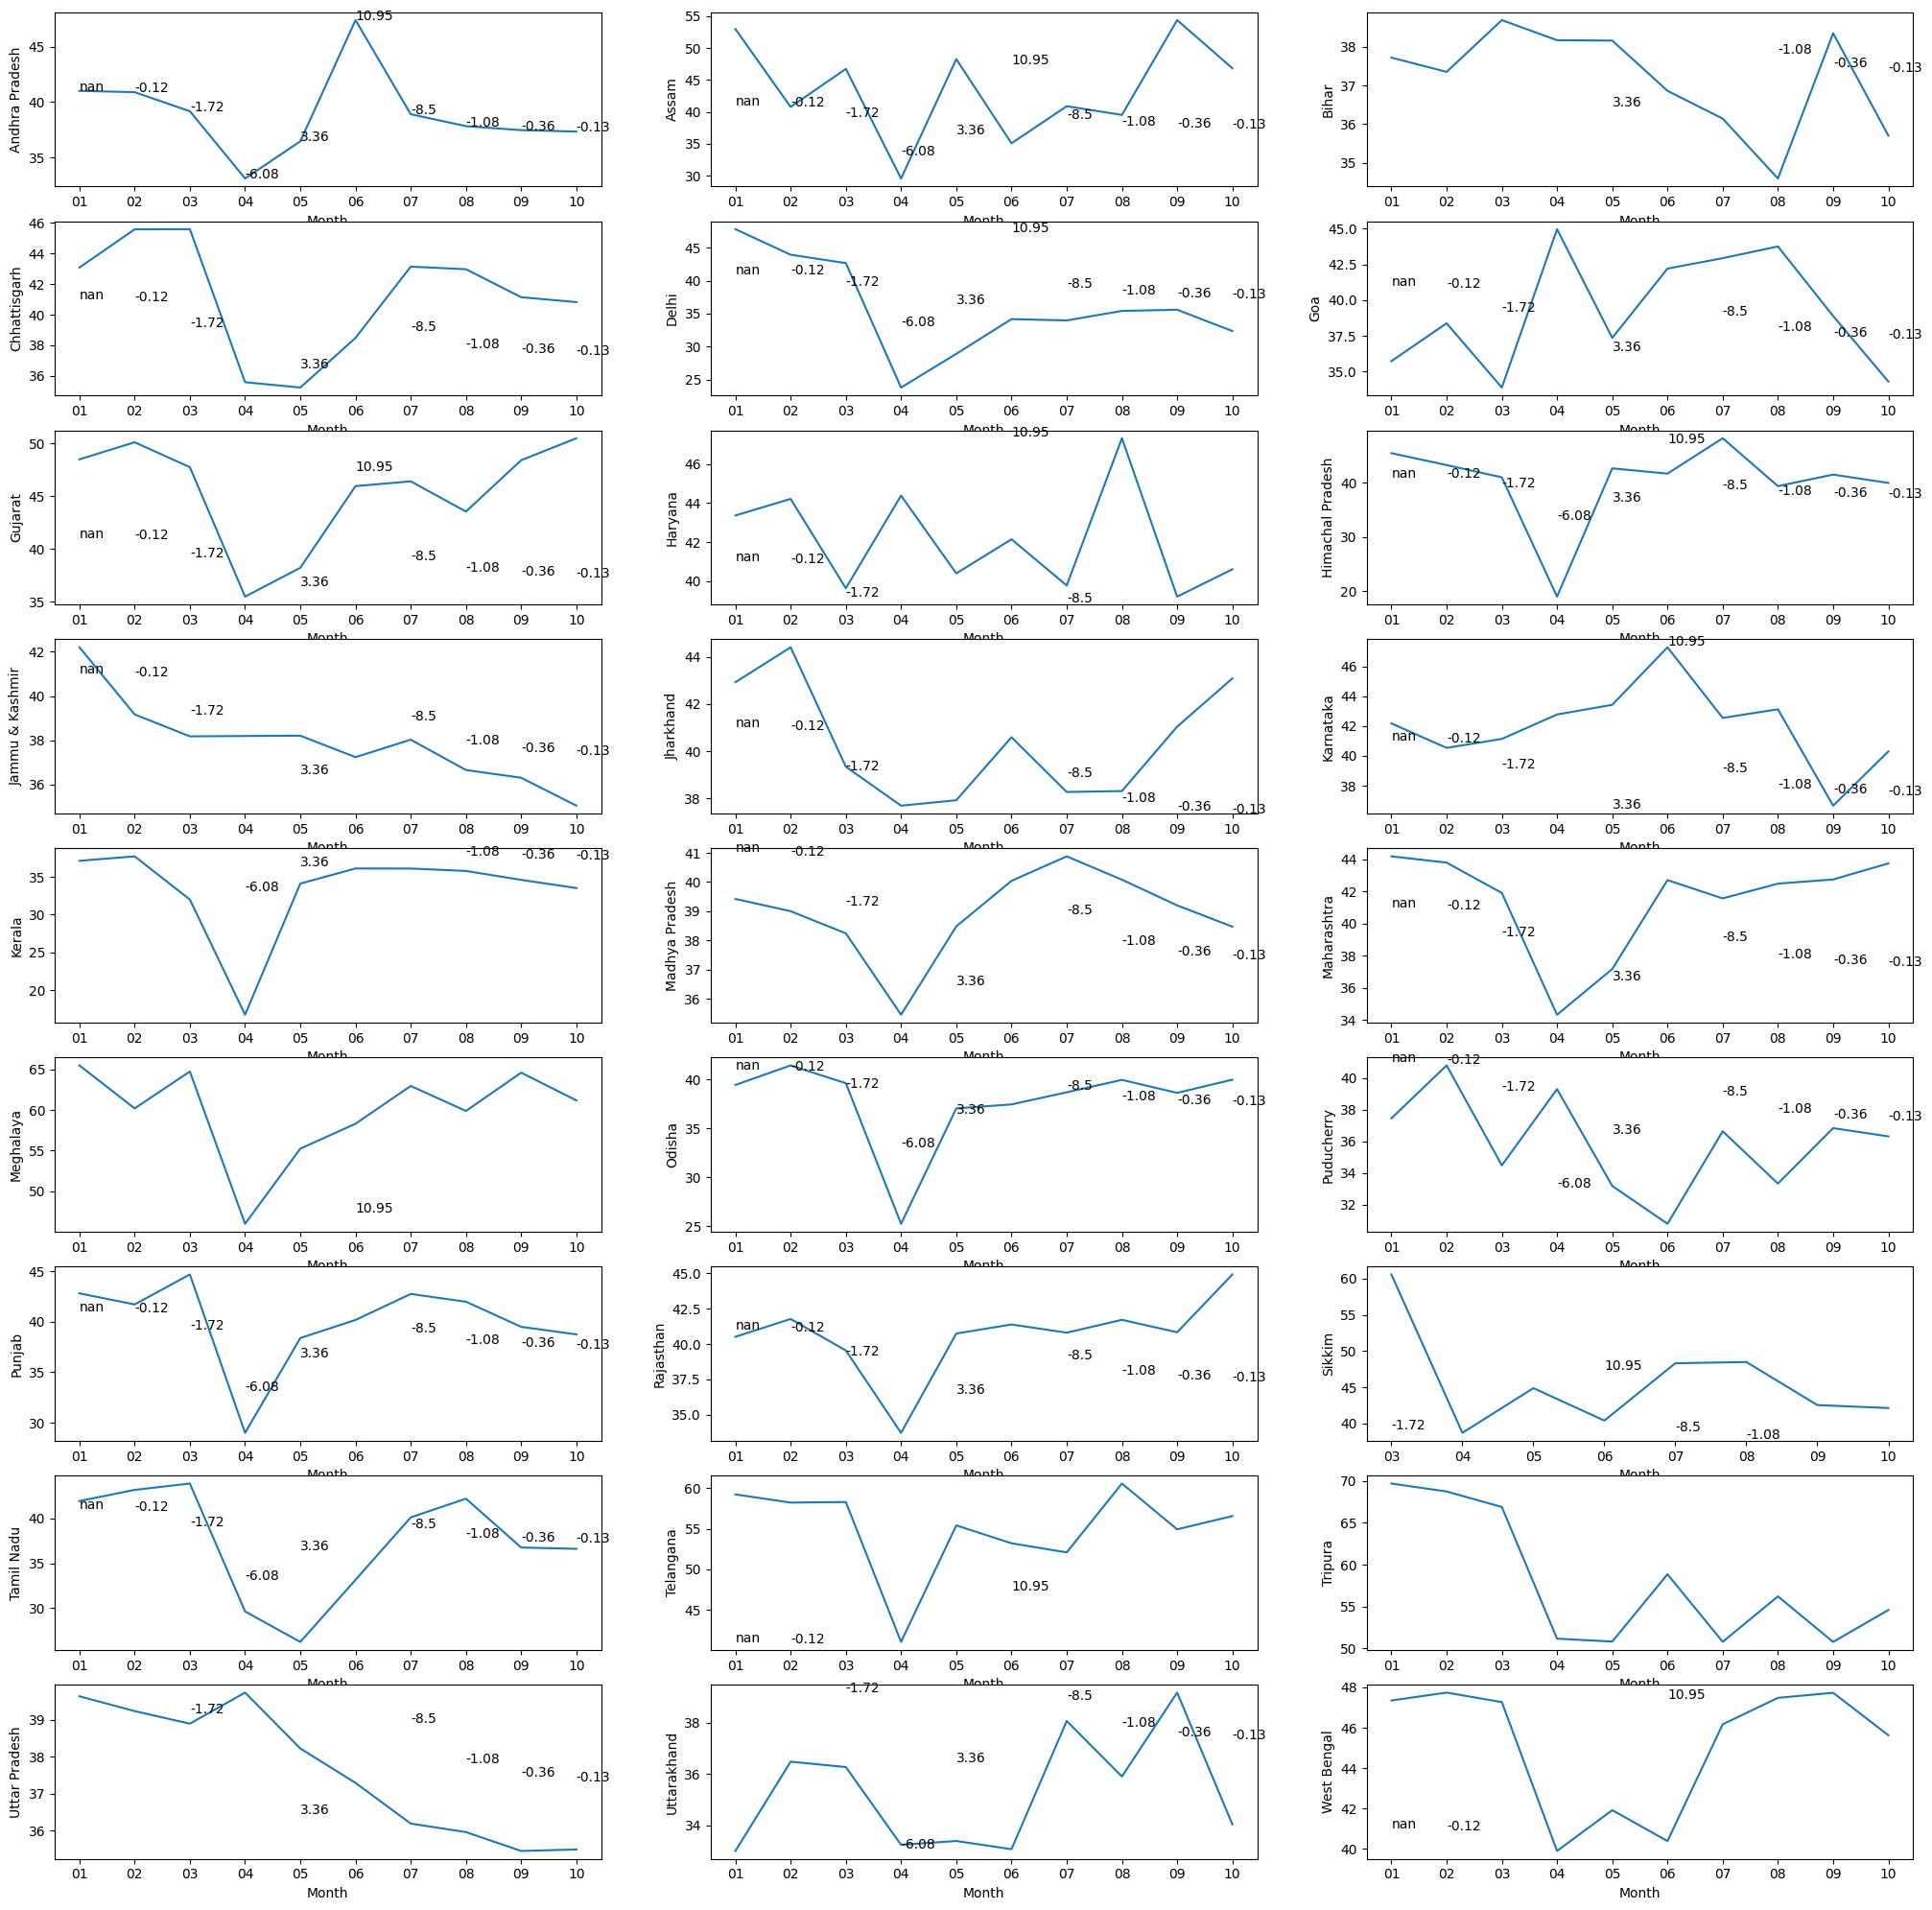

In [ ]:
fig, axes = plt.subplots(9,3,figsize=(25,25))
x=0
y=0
for i in data1['Region'].unique():
  sns.lineplot(
    pivoted[i], ax=axes[y,x]
  )
  for index, row in df_region.iterrows():
    axes[y,x].annotate(row['Diff'], (row['Month'], row['Estimated Labour Participation Rate (%)']))

 # axes[y,x].set_xlabel('Month')
 # axes[y,x].set_ylabel('Estimated Labour Participation Rate (%)')
 # axes[y,x].set_title('Andhra Pradesh Estimated labour Participation Rate with changes ')



  x=x+1
  if x>=3:
      x=0
      y=y+1
  else:
      continue



_____

In [ ]:
df=data1.drop(['Date','Frequency','Year'],axis=1)

In [ ]:
df.head(1)

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Day,Month
0,Andhra Pradesh,5.48,16635535,41.02,South,15.9129,79.74,31,01


In [ ]:
data1['Region.1'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

Stats of different month

# More Generalized Approach using Region ( larger area )
---
All above steps done for States can be done for Region.1 give more generalized approach.


<Axes: xlabel='Month', ylabel='Estimated Unemployment Rate (%)'>

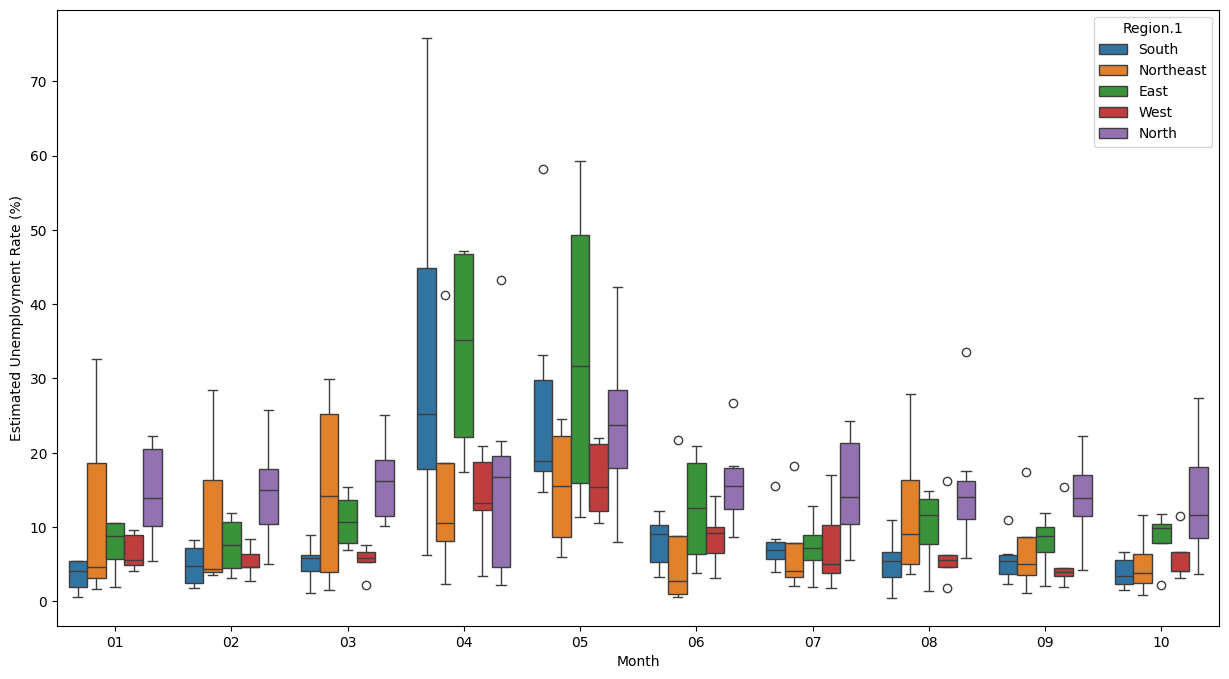

In [ ]:
fig, axes = plt.subplots(figsize=(15,8))
sns.boxplot(data=df,x='Month',y='Estimated Unemployment Rate (%)',hue="Region.1")

From above Box plot .
1. **North (Violet)** was Average high like North east.
   Most constant which spiked only slightly at 5th month.But then again remained as it was not decreaseing like all region had been decreasing.
2. **North East( dark orange )** was Average high all months and didnt spike much in 4th
   and 5th month.
3.**South(Blue)** was almost lowest all months expect it spiked in 4th and 5th
   month.
4.**West (Red)**  was one with lowest all month and only spiked twice in 4th and  
  5th month.
5. **East (green)** follows same as blue but with high value.   

**Highest to lowest Impacted Region**

*   **North East** *(complies with highest decline in labour )*
*   **North** *(this went both ways increament/decrement)*
*   **East**
*   **South**
*   **West**  *(complies with increament in labour )*



Same above diagram averaging all months for each regions.

<Axes: xlabel='Region.1', ylabel='Estimated Labour Participation Rate (%)'>

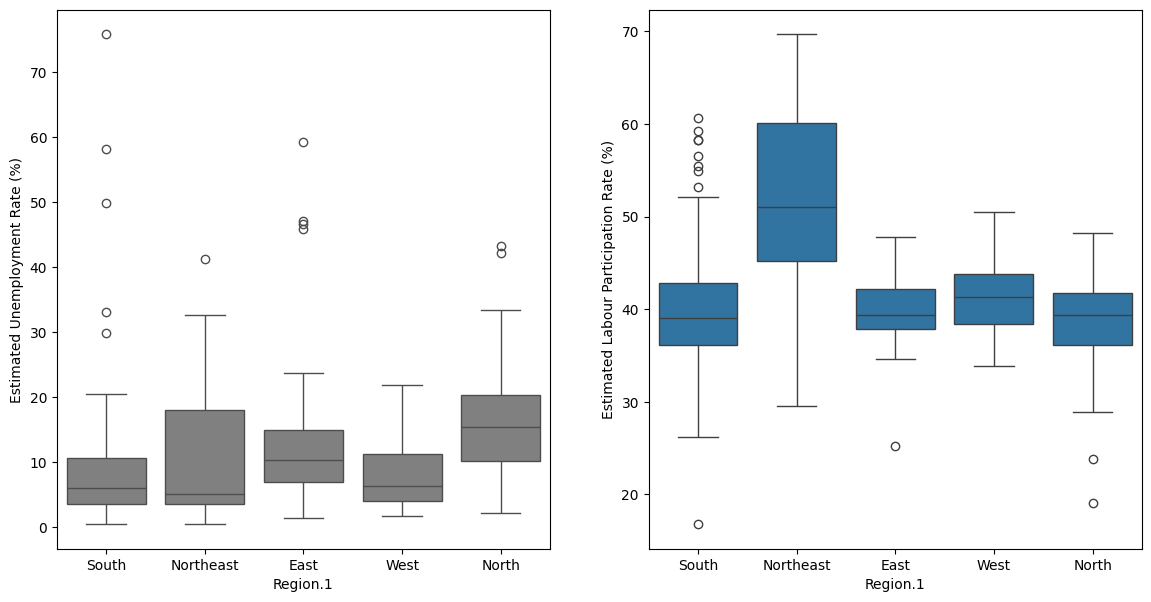

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(14,7))
sns.boxplot(x=df['Region.1'],y=df['Estimated Unemployment Rate (%)'],ax=axes[0],color='grey')
sns.boxplot(x=df['Region.1'],y=df['Estimated Labour Participation Rate (%)'], ax=axes[1])

North shows both high unemployment and high labour participation.

In [ ]:
df['Estimated Unemployment Rate (%)'].describe()

count    267.000000
mean      12.236929
std       10.803283
min        0.500000
25%        4.845000
50%        9.650000
75%       16.755000
max       75.850000
Name: Estimated Unemployment Rate (%), dtype: float64

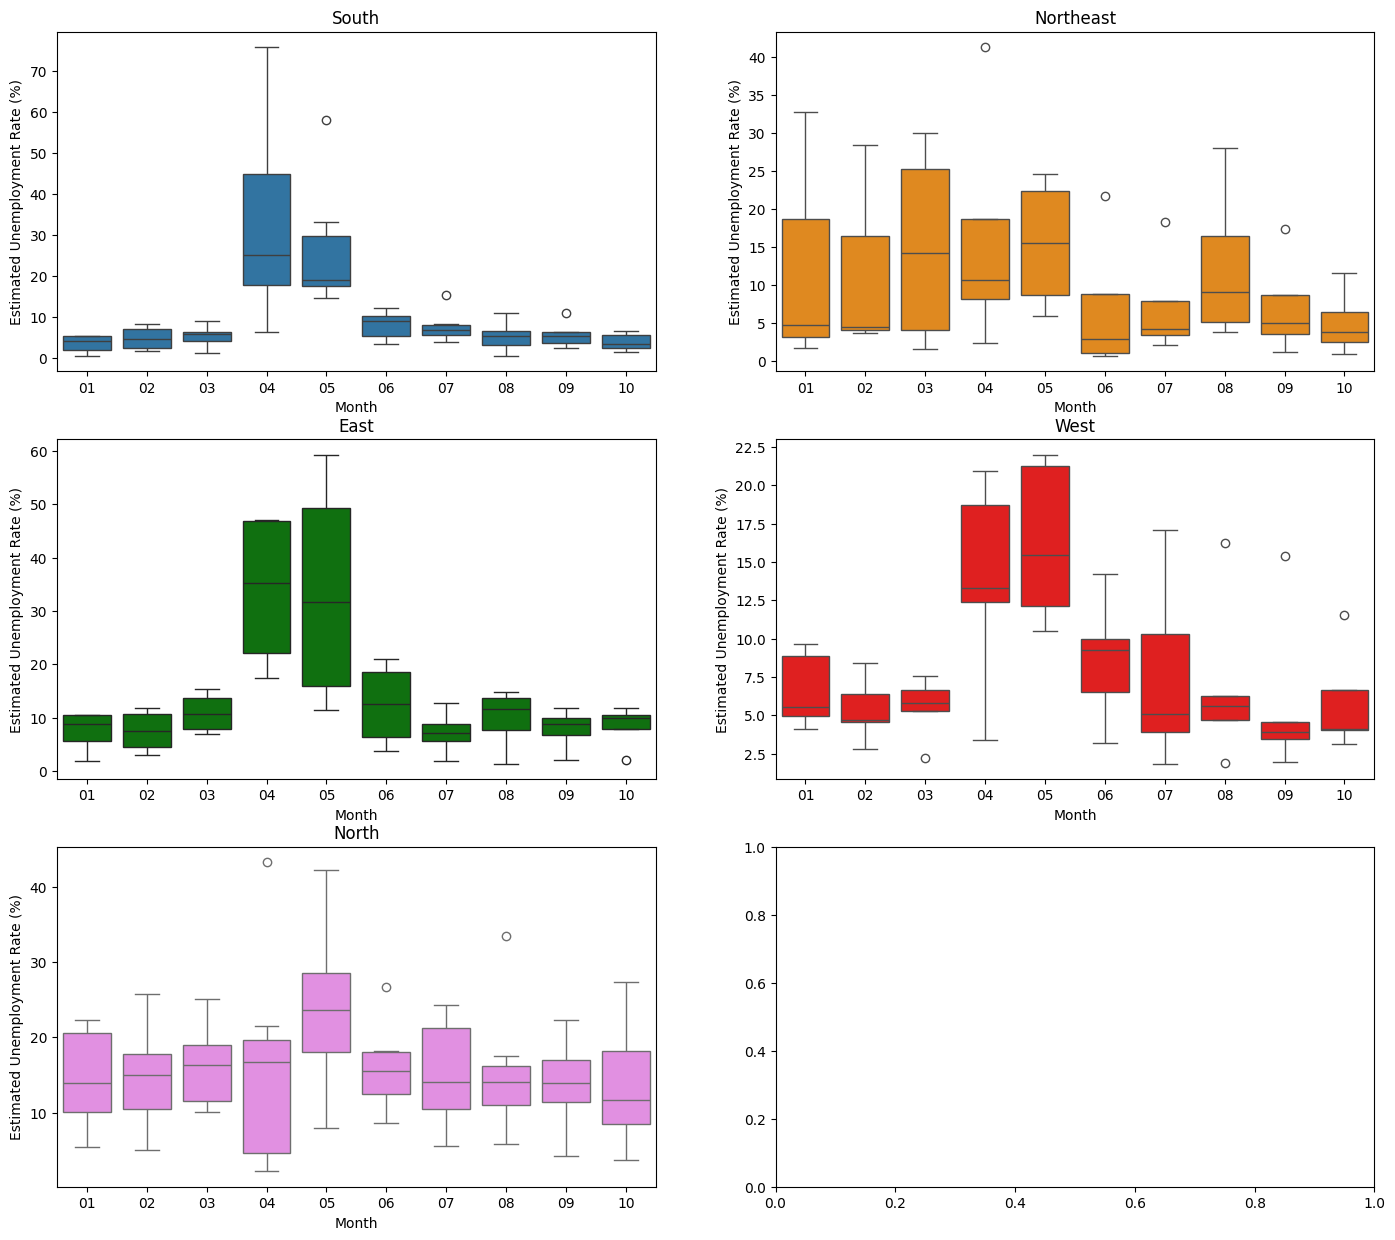

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(17,15))
x=0
y=0
color=[None, 'darkorange', 'green', 'red', 'violet']
for i,c in zip( df['Region.1'].unique(), color ):

  sns.boxplot(data=df[df['Region.1']==i],
              x='Month',
              y='Estimated Unemployment Rate (%)',
              ax=axes[x,y],
              color=c
              )
  axes[x,y].set_title(i)
  y=y+1
  if y>=2:
    y=0
    x=x+1
  else:
    continue

In [ ]:
data2=pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [ ]:
data2.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74


In [ ]:
data2.count

<bound method DataFrame.count of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.9